In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np

dataFile = "D:/radiomic1/glioma/csv2/train_dataset.csv"
data = pd.read_csv(dataFile)
dataFile_test = "D:/radiomic1/glioma/csv2/test_dataset.csv"
data_test = pd.read_csv(dataFile_test)
x = data.iloc[:, 2:]
y = data["label"]
x_test = data_test.iloc[:, 2:]
y_test = data_test["label"]
x.shape

C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(127, 965)

In [2]:
# log函数，以10为底，即lg(-10)至lg(-1)中随机取100个数。
alphas = np.logspace(-10, -1, 100, base=10)
alphas

selector_lasso = LassoCV(alphas=alphas, cv=5, max_iter=int(1e6))
# alphas = alphas即上面生成的数组，cv = 5即5次交叉验证
selector_lasso.fit(x, y)  # 拟合

selector_lasso.alpha_  # 选出最优的a值，此值不可在alphas（即lg(-10)至lg(-1)）的范围内，否则这个边界设置不合理。

selector_lasso.coef_  # 特征系数

x.columns[selector_lasso.coef_ != 0]  # 把不等于0的特征系数挑选出来，删除特征系数=0的无意义特征

x[x.columns[selector_lasso.coef_ != 0]]  # 生成DataFrame

selector_lasso.intercept_  # 截距

selector_lasso.mse_path_.shape  # selector_lasso.mse_path_为每次交叉验证的误差

selector_lasso.mse_path_.mean(axis=1)  # 5次误差的平均值，axis = 1表示列


C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.562e-01, tolerance: 2.436e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e-01, tolerance: 2.436e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

array([126.4563093 , 116.10907937, 114.04063086, 116.32575533,
       119.00782171, 126.22635028, 130.42598374, 130.01978443,
       130.50281806, 131.61487585, 132.86742315, 133.84985608,
       134.05605183, 133.43884157, 131.8495533 , 130.55096917,
       129.49745409, 128.64469217, 127.94696376, 127.38495308,
       126.93161372, 126.54404181, 126.22306778, 126.01664527,
       125.85045692, 125.85045336, 125.85042907, 125.85038901,
       125.85035306, 125.85036512, 125.85045415, 125.85057885,
       125.85075765, 125.85109227, 125.85141706, 125.85195916,
       125.85272624, 125.85351305, 125.85443798, 125.85533543,
       125.85618854, 125.8570101 , 125.85778194, 125.85845913,
       125.85905497, 125.85965618, 125.8604784 , 125.86120365,
       125.86173267, 125.86219409, 125.86261938, 125.86293439,
       125.86314745, 125.86330007, 125.86340559, 125.86373466,
       125.86374901, 125.86376369, 125.8637718 , 125.86378082,
       125.86378689, 125.86378566, 125.86378024, 125.86

In [3]:
# # 保存所选特征到CSV文件
selected_features_df = x[x.columns[selector_lasso.coef_ != 0]]
selected_features_test = x_test[x_test.columns[selector_lasso.coef_ != 0]]

labels = data["label"]  # 假设标签列名为'label'，请根据实际情况修改
labels_test = data_test["label"]

# 将标签列与选择的特征数据框合并
selected_features_with_labels = pd.concat(
    [selected_features_df, labels], axis=1)
selected_features_with_labels_test = pd.concat(
    [selected_features_test, y_test], axis=1)

# 保存合并后的数据框为CSV文件
selected_features_with_labels.to_csv('D:/radiomic1/glioma/csv2/' +
                                     'lasso_selected_features_train_t2_s.csv', index=False)
selected_features_with_labels_test.to_csv(
    'D:/radiomic1/glioma/csv2/'+'lasso_selected_features_test_t2_s.csv', index=False)

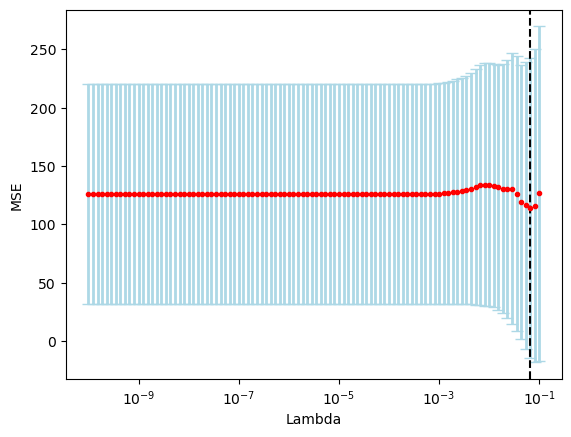

In [4]:
# 图一

MSEs_mean = selector_lasso.mse_path_.mean(axis=1)
MSEs_std = selector_lasso.mse_path_.std(axis=1)

plt.figure()
plt.errorbar(selector_lasso.alphas_, MSEs_mean, yerr=MSEs_std  # 第一个表示x轴，第二表示y轴，第三表示误差范围即蓝线误差棒
             , fmt="o"  # 数据点标记
             , ms=3  # 数据点大小
             , mfc="r"  # 数据点颜色
             , mec="r"  # 数据点边缘颜色
             , ecolor="lightblue"  # 误差棒颜色
             , elinewidth=2  # 误差棒线宽
             , capsize=4  # 误差棒边界线长度
             , capthick=1  # 误差棒边界线厚度
             )
plt.semilogx()  # 画横坐标
plt.axvline(selector_lasso.alpha_, color="black",
            ls="--")  # 在最小MSE值，即最佳Lambda画竖线
plt.xlabel("Lambda")  # x轴标签
plt.ylabel("MSE")  # y轴标签
plt.show()  # 展示

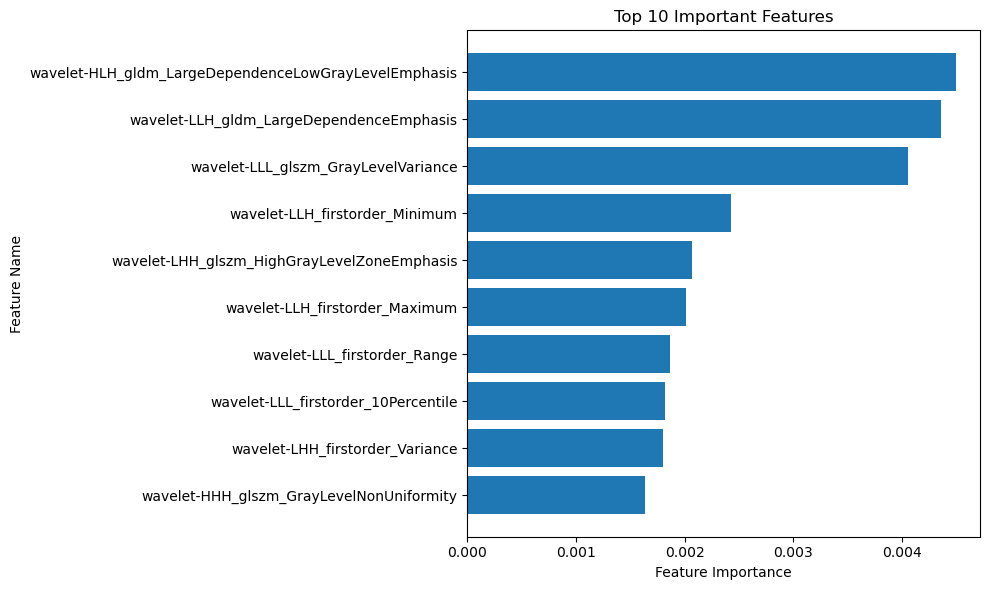

In [5]:

# # 提取特征重要性
# feature_importances = np.abs(selector_lasso.coef_)

# # 按特征重要性排序
# sorted_indices = np.argsort(feature_importances)[::-1]
# sorted_feature_names = x.columns[sorted_indices[:10]]
# sorted_feature_importances = feature_importances[sorted_indices[:10]]
# # 绘图
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_feature_names)), sorted_feature_importances)
# plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Name')
# plt.title('Top 10 Important Features')
# plt.tight_layout()
# plt.show()
# 提取特征重要性
feature_importances = np.abs(selector_lasso.coef_)

# 创建包含特征名和特征重要性的DataFrame
features_df = pd.DataFrame({
    'Feature Name': x.columns,
    'Importance': feature_importances
})

# 保存整个特征重要性列表到CSV
features_df.to_csv('D:/radiomic1/glioma/csv2/Lasso_feature_importances.csv', index=False)

# 按特征重要性排序，选择前10个
sorted_features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# 绘图
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_df['Feature Name'], sorted_features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.gca().invert_yaxis()  # 使最重要的特征在顶部
plt.show()


C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.750e-01, tolerance: 7.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.131e-01, tolerance: 7.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

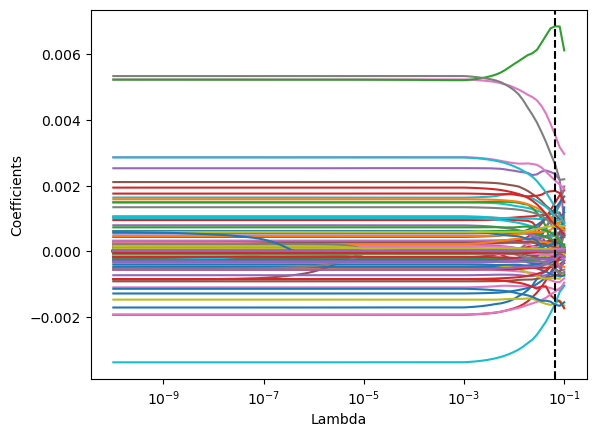

In [6]:

# 图二
coefs = selector_lasso.path(x, y, alphas=alphas, max_iter=1e6)[1].T
plt.figure()
plt.semilogx(selector_lasso.alphas_, coefs, '-')  # 以对数形式画横轴，
plt.axvline(selector_lasso.alpha_, color='black', ls="--")
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()
